# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## apply the statsmodel lib
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [33]:
raw_data = pd.read_csv('Bank-data.csv')

In [34]:
data = raw_data.copy()
data = data.drop(data.columns[0], axis='columns')
data['y'] = data['y'].map({ 'yes': 1, 'no': 0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [37]:
x1 = data[['interest_rate','duration']]
y = data['y']
x = sm.add_constant(x1)

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [38]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.395898
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      515
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Jul 2019   Pseudo R-squ.:                  0.4288
Time:                        18:15:13   Log-Likelihood:                -205.08
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 1.348e-67
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0473      0.241     -0.196      0.844      -0.520       0.425
interest_rate    -0.8072      0.079    -10.242      0.000      -0.962      -0.653
duration          0.0064      0.001      9.384      0.000       0.005       0.008
=================================================================================
"""

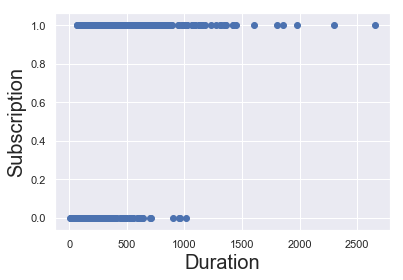

In [45]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1['duration'],y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [49]:
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']


In [54]:
X_all = sm.add_constant(X1_all)
reg_log = sm.Logit(y,X_all)
results_logit = reg_log.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2019-07-21 18:30 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [55]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [56]:
cm = confusion_matrix(X_all,y,results_logit)
cm

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [58]:
test_data = pd.read_csv('Bank-data-testing.csv').copy()
test_data = test_data.drop(test_data.columns[0], axis='columns')
test_data['y'] = test_data['y'].map({ 'yes': 1, 'no': 0})
test_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [66]:
estimators=['interest_rate','credit','march','previous','duration']
X1_test = test_data[estimators]
X_test = sm.add_constant(X1_test)


In [67]:
y_test = test_data['y']

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [74]:
cm_test = confusion_matrix(X_test,y_test,results_logit)

print('train\n', cm)
print('test\n', cm_test)

train
 (array([[218.,  41.],
       [ 30., 229.]]), 0.862934362934363)
test
 (array([[93., 18.],
       [13., 98.]]), 0.8603603603603603)
